#**Arnold's cat map on Images**



##Step one import images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow
from random import randint
from PIL import Image
from PIL import ImageOps


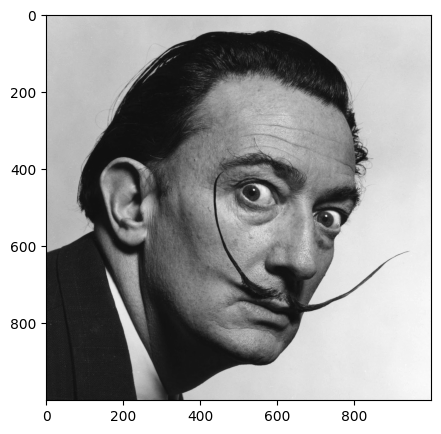

In [2]:
img = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://images.squarespace-cdn.com/content/v1/531e472ae4b05d85bc55629e/1408775797772-S1ILWBYYO6IG4WKJAOXT/image-asset.jpeg?format=1000w').read()), dtype=np.uint8), 0)
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.add_subplot(1,1,1)
plt.imshow(img,'gray')

##Here we define our histogram function

In [3]:
def draw_hist(x_axis, input):
    figsize = (5, 5)
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax

## We calculate the histogram of the input image

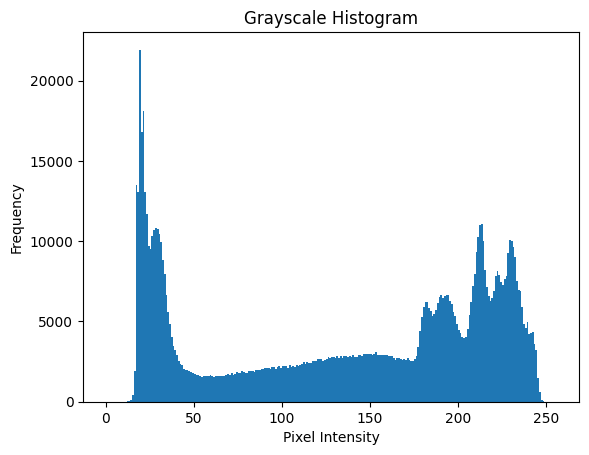

In [ ]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(img.ravel(), bins=256, range=(0,256))
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## Now we define Arnold Cat Map

In [ ]:
def arnold_cat_map(image, iterations):

    height, width = image.shape
    assert height == width, "Image should be square"
    assert height % 2 == 0, "Image size should be even"

    transformationMatrix = np.array([[2, 1], [1, 1]])


    for i in range(iterations):
        for x in range(height):
            for y in range(width):

                old_pos = np.array([x, y])
                new_pos = np.dot(transformationMatrix, old_pos) % height
                image[x, y] = image[new_pos[0], new_pos[1]]

    return image


## Let's use the Arnold cat map

In [ ]:
ACMimg= arnold_cat_map(img, 10)

the output:

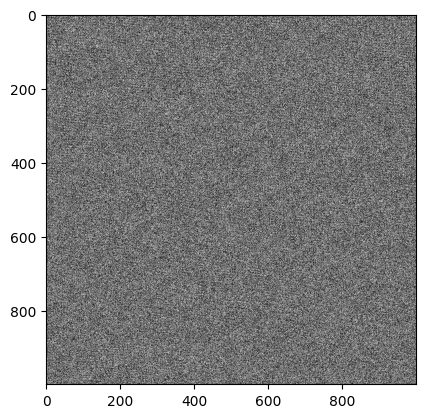

In [ ]:
plt.imshow(ACMimg,'gray')

## Let's draw the histogram of arnold cat map:

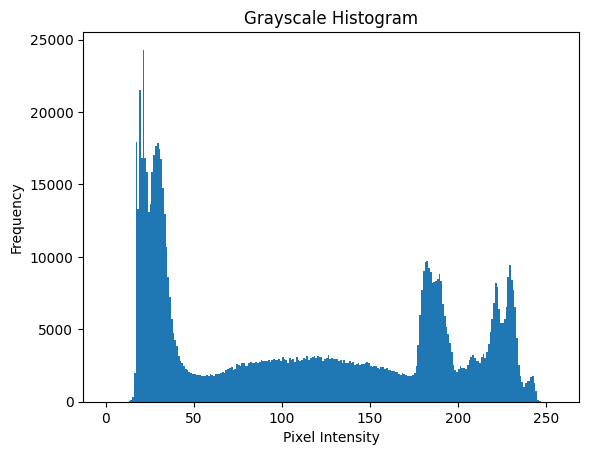

In [ ]:
hist = cv2.calcHist([ACMimg], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(ACMimg.ravel(), bins=256, range=(0,256))
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## Let's compare them:

(([], []), ([], []))

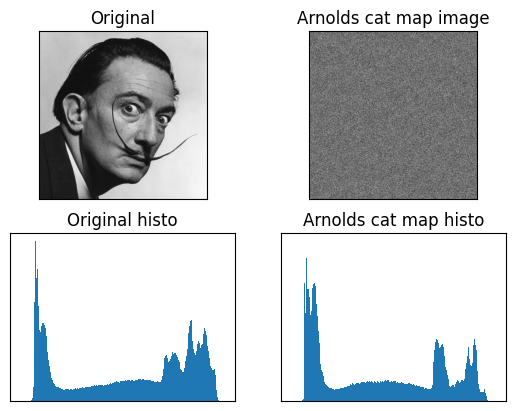

In [ ]:
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(ACMimg,'gray'),plt.title('Arnolds cat map image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.hist(img.ravel(), bins=256, range=(0,256)),plt.title('Original histo')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.hist(ACMimg.ravel(), bins=256, range=(0,256)),plt.title('Arnolds cat map histo')
plt.xticks([]), plt.yticks([])

## let's calculate entropy

In [ ]:
from scipy.stats import entropy


In [ ]:
# Calculate the probability distribution of pixel intensities
pixel_probOrg = cv2.calcHist([img], [0], None, [256], [0, 256]) / img.size
pixel_probACM = cv2.calcHist([ACMimg], [0], None, [256], [0, 256]) / ACMimg.size

# Calculate entropy
entropy_valOrg = entropy(pixel_probOrg, base=2)
entropy_valACM = entropy(pixel_probACM, base=2)

print("Entropy of the ORG image:", entropy_valOrg, "\nEntropy of the ACM image:", entropy_valACM )


Entropy of the ORG image: [7.52702806] 
Entropy of the ACM image: [7.40304094]


🏁Done🏁